In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge,RidgeCV

import warnings
warnings.filterwarnings('ignore')

Imported the needed libraries

In [12]:
data=pd.read_csv(r"C:\Users\Rakesh\Downloads\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


From this ,we can see one unnamed column 

In [13]:
data.shape

(18249, 14)

There is 18249 rows and 14 columns in this data set

In [14]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Seems there is no null values in this given data set 

We have 3 object data types 

In [16]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Confirming that ther is no null va;ues in this data set 


In [17]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [18]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

We have two values in the type column<'conventional', 'organic'>, using label encoder , we are giving name 0,1 accordingly

In [19]:
lab_enc=LabelEncoder()
data1=lab_enc.fit_transform(data['type'])
pd.Series(data1)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

In [20]:
data['type']=data1

Like type, chnaging the region as well 

In [21]:
data2=lab_enc.fit_transform(data['region'])
pd.Series(data2)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int32

In [22]:
data['region']=data2

In [23]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


The region and type got changed into numerical values

In [24]:
x=data.drop(columns=['Unnamed: 0','Date','region'])
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


We dont want the unnamed column, so we are droping it

region is our target, and date we dont want , so we are dropping that too

In [25]:
y=data['region']
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

Seperated target and features

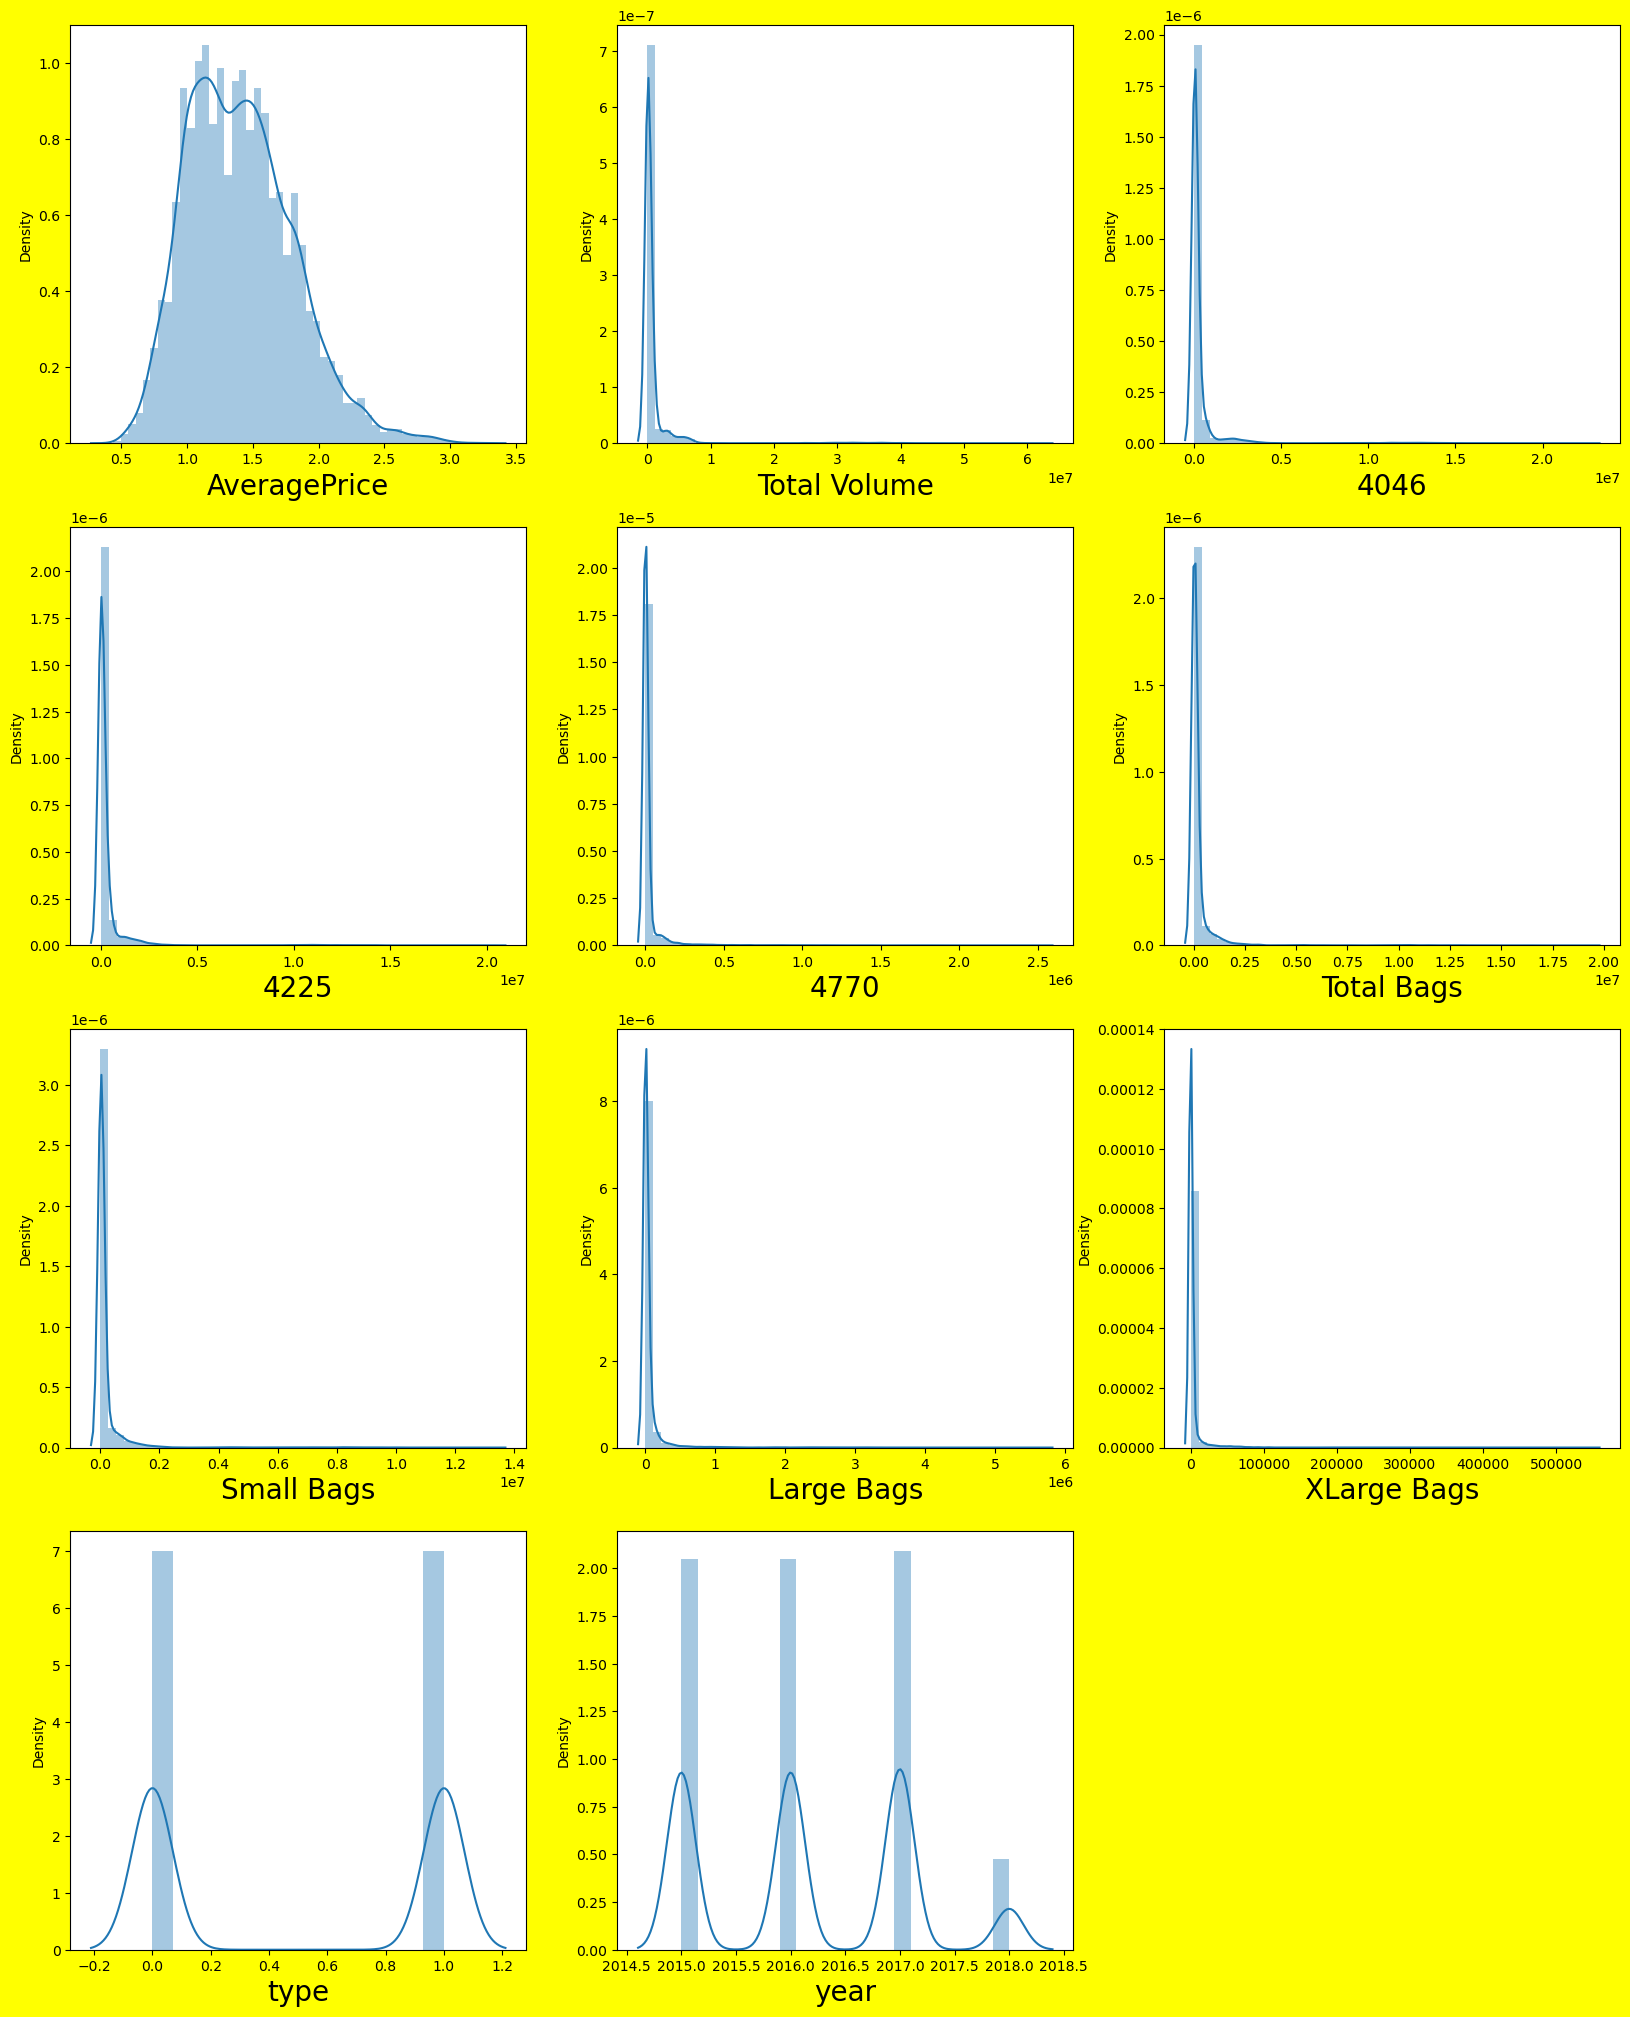

In [26]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber <=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Seems we are having outliers in every columns

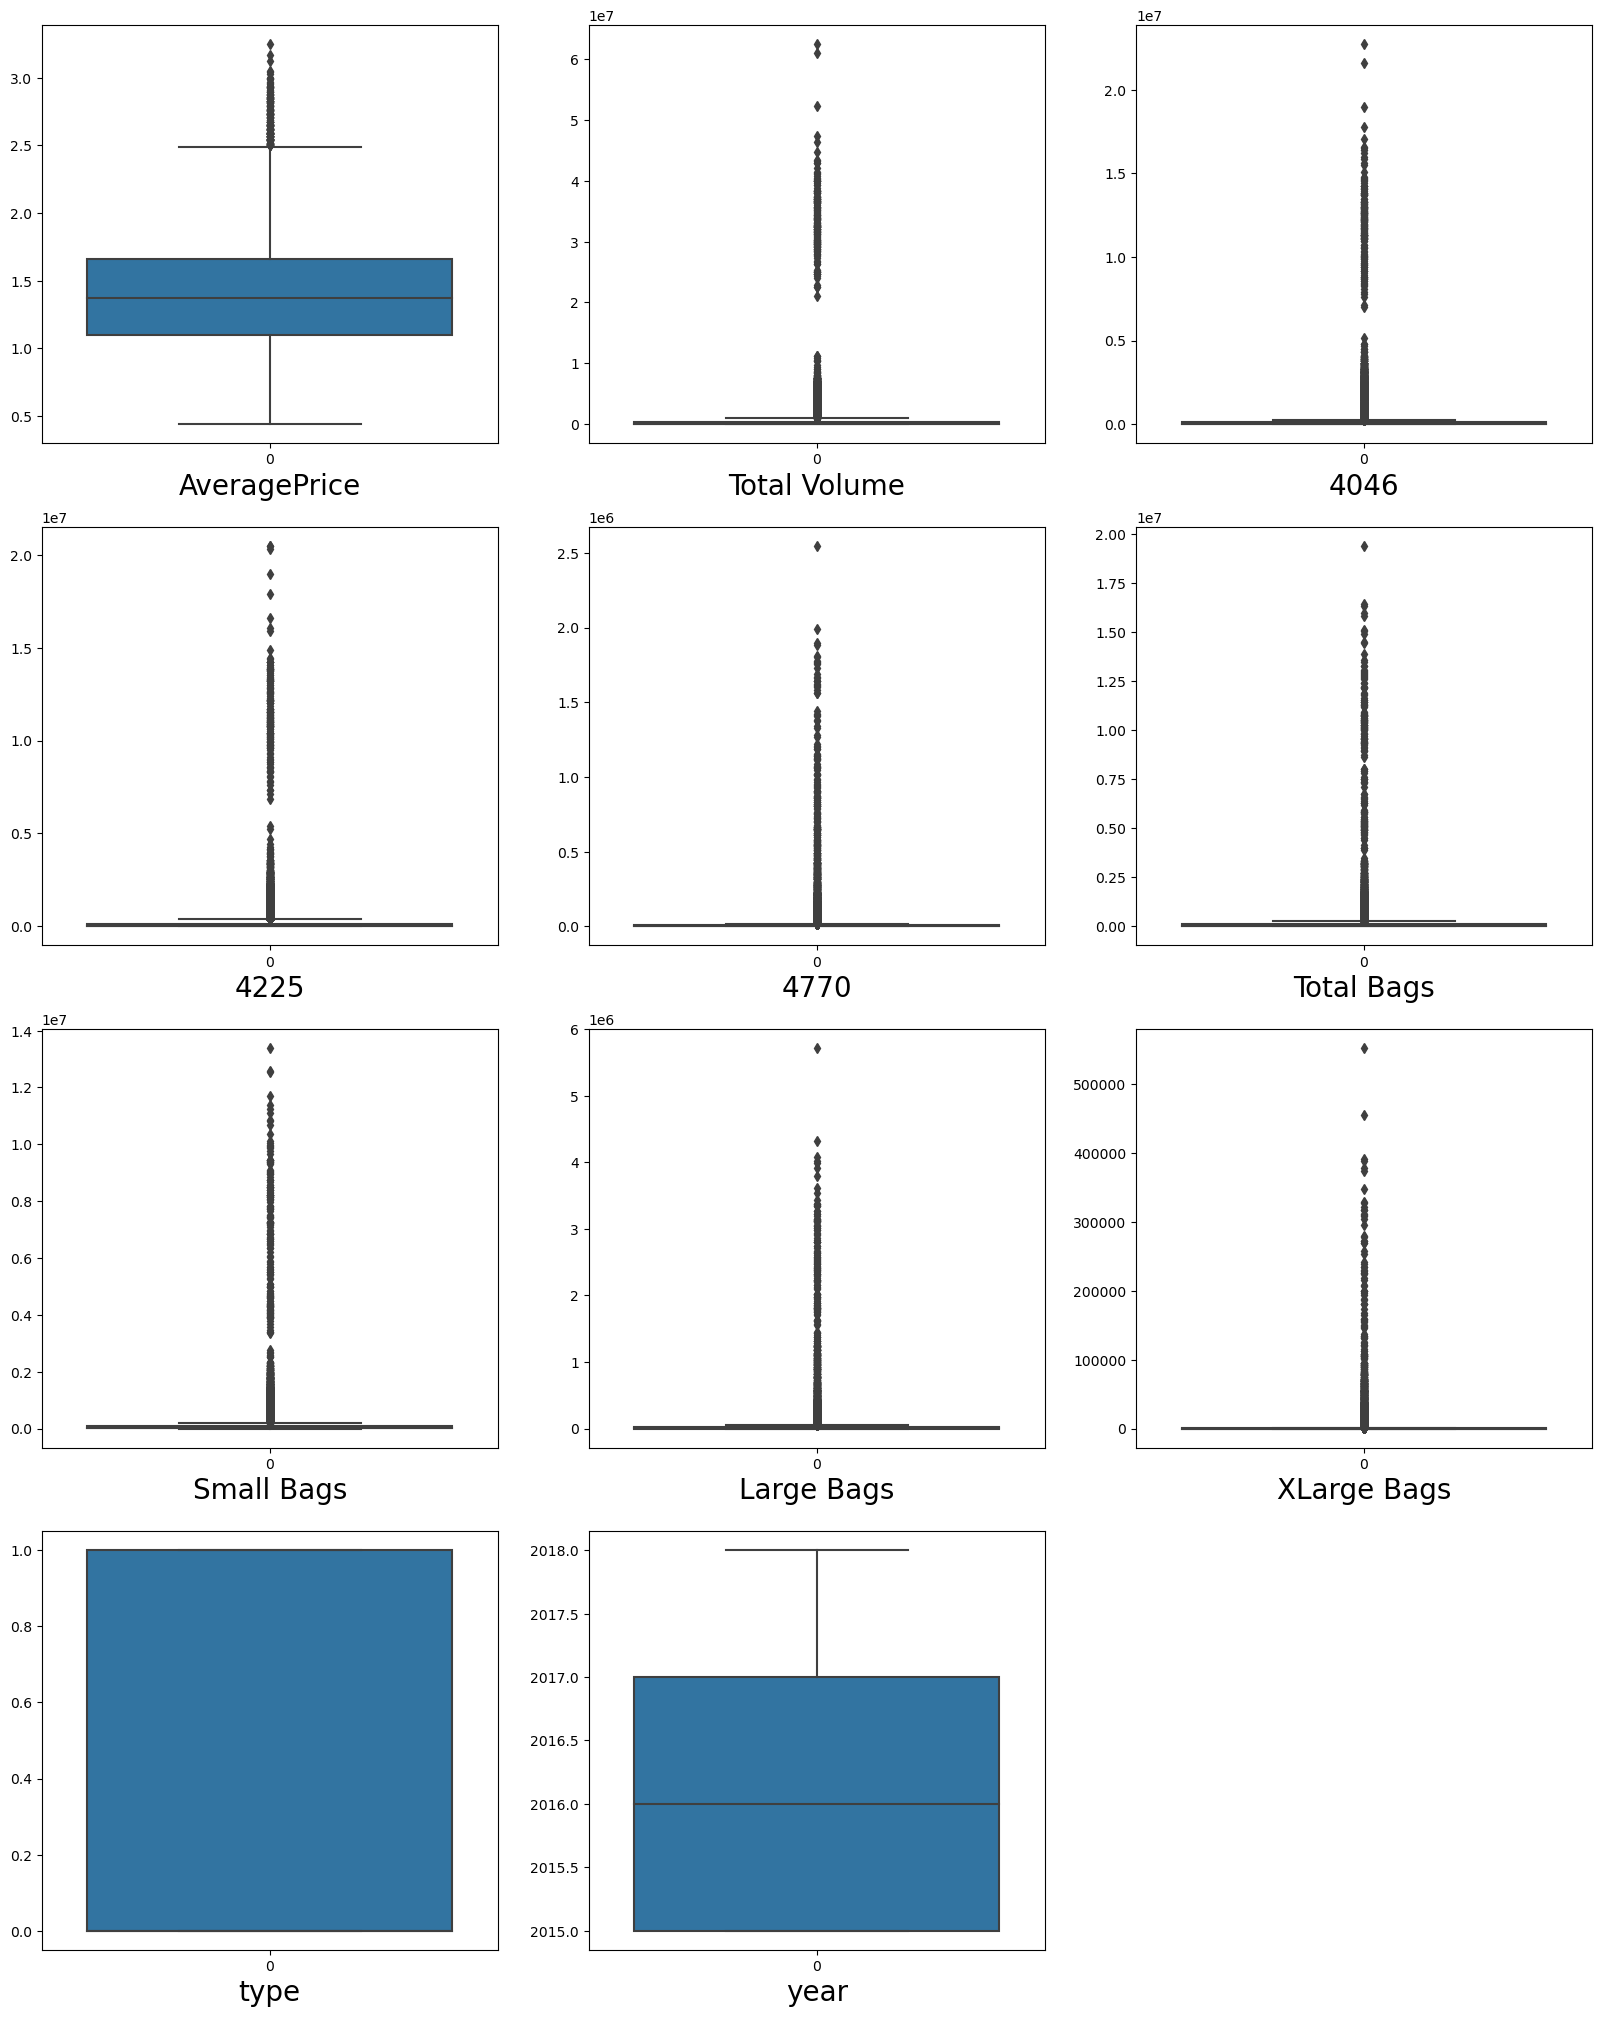

In [27]:
plt.figure(figsize=(20,25))
graph=1

for column in x:
    if graph<=11:
        plt.subplot(4,3,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

As per the above graph, the count of outliers are more 
So we cant ignore that.

Trying to build the model as it is

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

Splitted the train and test values with the test size 0.25

In [30]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==========================Train Result=====================')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('\n==========================Test Result=====================')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n\n Test classifiaction report\n',classification_report(y_test,pred,digits=2))

In [31]:
reg=DecisionTreeClassifier()
reg.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
metric_score(reg,x_train,x_test,y_train,y_test,train=True)
metric_score(reg,x_train,x_test,y_train,y_test,train=False)


==========================Train Result=====================
Accuracy score:100.00%

==========================Test Result=====================
Accuracy score:79.44%


 Test classifiaction report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        81
           1       0.77      0.80      0.79       102
           2       0.92      0.93      0.93        92
           3       0.73      0.85      0.78        81
           4       0.77      0.88      0.82        73
           5       0.75      0.67      0.71        79
           6       0.95      0.94      0.94        78
           7       0.76      0.84      0.80        73
           8       0.91      0.92      0.91        75
           9       0.82      0.79      0.81        82
          10       0.74      0.77      0.75        83
          11       0.93      0.90      0.91        89
          12       0.83      0.78      0.80        95
          13       0.79      0.74      0.76   

We got the accuracy level around 79, seems its good

## Average price 

In [33]:
x1=data.drop(columns=['Unnamed: 0','Date','AveragePrice'])
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


For finding average price, we are seperting target and features again

In [34]:
y1=data['AveragePrice']
y1.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

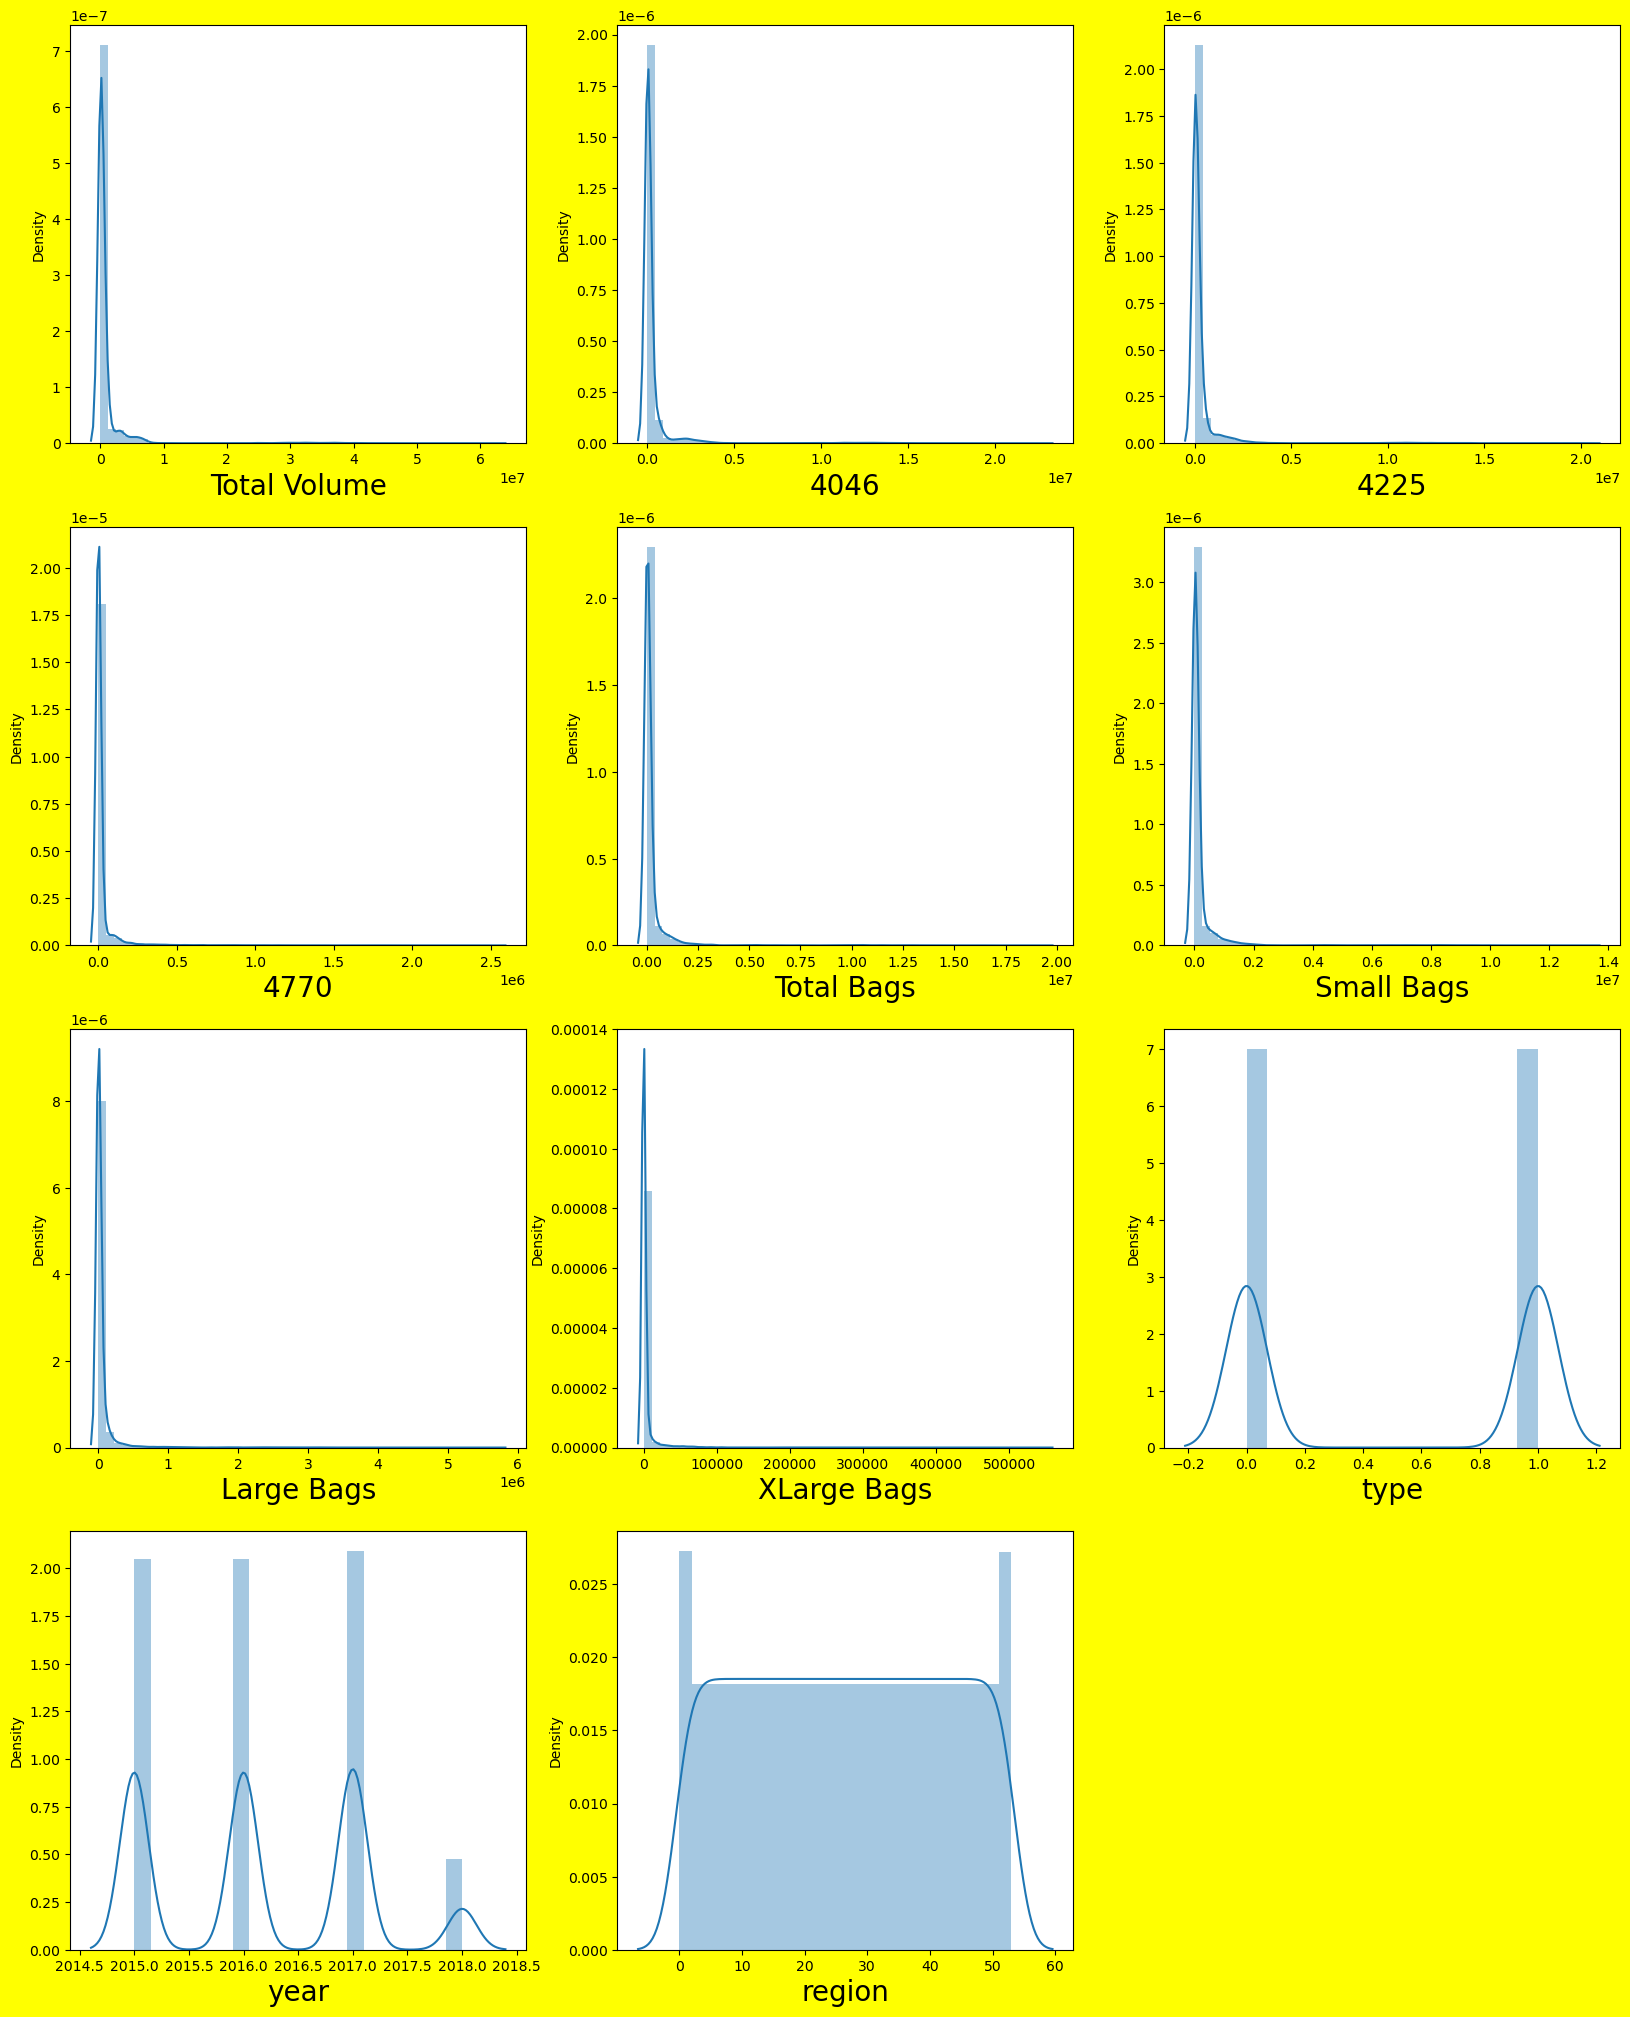

In [35]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in x1:
    if plotnumber <=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [36]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=355)

Splitted the train and test value 

In [37]:
avg_pri=DecisionTreeRegressor()
avg_pri.fit(x1_train,y1_train)

DecisionTreeRegressor()

Built the model using DecissionTreeRegressor

In [38]:
y1_pred = avg_pri.predict(x1_test)

Predicted the test values

In [40]:
mse = mean_squared_error(y1_test, y1_pred)
print(f'Mean Squared Error: {mse:.2f} ')
mae=mean_absolute_error(y1_test,y1_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 0.05 
Mean Absolute Error: 0.15


The error values are too low , so its seems good

In [44]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [45]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x1_train, y1_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [46]:
ridgecv.alpha_

0.09099999999999998

In [48]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x1_train, y1_train)

Ridge(alpha=0.09099999999999998)

In [49]:
ridge_model.score(x1_test,y1_test)

0.40134617802076866

The score we got before regularization is better, so we can use that model for the prediction